# Data Methods for Health Research Assignment

In [1]:
#preliminaries
import pandas as pd
import numpy as np
import sys

%matplotlib inline
import random
import matplotlib.pyplot as plt

### Assignment A

The NHS has been challenged to make 'efficiency savings' and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. Using data from the HSCIC GP Prescribing dataset for your assigned city, address the following queries using a combination of narrative, tables, figures and descriptive statistics.

My assigned city is LIVERPOOL.

#### 1. Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column).

Information about GP prescribing is found at https://data.gov.uk/dataset/prescribing-by-gp-practice-presentation-level 

General practice prescribing data is a list of all medicines, dressings and appliances that are prescribed and dispensed each month. A record will only be produced when this has occurred and there is no record for a zero total.

In [2]:
#Reading in the December 2015 prescribing data to a pandas dataframe

cols1 = ['SHA', 'PCT', 'PRACTICE', 'BNF CODE', 'BNF NAME', 'ITEMS', 'NIC', 'ACT COST', 'QUANTITY', 'PERIOD']
dec2015 =  pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv', header=None, names=cols1, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

In [3]:
#Reading in the December 2015 practices data to a pandas dataframe

cols2 = ['COL A', 'PRACTICE', 'PRACTICE NAME', 'ADDRESS LINE 1', 'ADDRESS LINE 2', 'TOWN', 'CITY', 'POSTCODE']
pract =  pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv', names=cols2, index_col=False)

In [4]:
#Creating a pandas dataframe which contains just the subset of GP practices found in Liverpool

pract['POSTCODE'] = pract['POSTCODE'].str.replace(" ","") #removing white spaces from postcode strings

liverpool = pract[pract['POSTCODE'].str.startswith(("L1","L2","L3","L4","L5","L6","L7","L8","L9"))]
liverpool #A pandas dataframe of all the information about GP practices in Liverpool

,COL A,PRACTICE,PRACTICE NAME,ADDRESS LINE 1,ADDRESS LINE 2,TOWN,CITY,POSTCODE
5844,201512,N82001,THE MARGARET THOMPSON MED CENTRE,THE MARGARET THOMPSON MC,105 EAST MILLWOOD ROAD,LIVERPOOL,,L246TH
5845,201512,N82002,YEW TREE CENTRE,BERRYFORD ROAD,DOVECOT,LIVERPOOL,,L144ED
5846,201512,N82003,DOVECOT HEALTH CENTRE,DOVECOT FAMILY HEALTH CTR,LONGREACH RD DOVECOT,LIVERPOOL,,L140NL
5847,201512,N82004,GARSTON URBAN - SSP HEALTH LIMITED,SOUTH LIVERPOOL NHS T/C,32 CHURCH ROAD,LIVERPOOL,,L192LW
5848,201512,N82009,GRASSENDALE MEDICAL CENTRE,23 DARBY ROAD,,LIVERPOOL,,L199BP
5849,201512,N82011,PRIORY MEDICAL CENTRE,PRIORY MEDICAL CENTRE,BELMONT GROVE ANFIELD,LIVERPOOL,,L64EW
5850,201512,N82014,LANCE LANE MEDICAL CENTRE,LANCE LANE MEDICAL CENTRE,19 LANCE LANE WAVERTREE,LIVERPOOL,,L156TS
5851,201512,N82018,ELLERGREEN MEDICAL CENTRE,ELLERGREEN MEDICAL CENTRE,24 CARR LANE,NORRIS GREEN LIVERPOOL,,L112YA
5852,201512,N82019,LANGBANK MEDICAL CENTRE,LANGBANK MEDICAL CENTRE,BROAD LANE NORRIS GREEN,LIVERPOOL,,L111AD
5853,201512,N82022,EDGE HILL HEALTH CENTRE,EDGE HILL HEALTH CENTRE,157 EDGE LANE,LIVERPOOL,MERSEYSIDE,L72AB


In [5]:
#Extracting the GP practice codes from the liverpool pandas dataframe of all GP practices in Liverpool
liverpool_prac = liverpool['PRACTICE'].tolist()
liverpool_prac

['N82001',
 'N82002',
 'N82003',
 'N82004',
 'N82009',
 'N82011',
 'N82014',
 'N82018',
 'N82019',
 'N82022',
 'N82024',
 'N82026',
 'N82033',
 'N82034',
 'N82035',
 'N82036',
 'N82037',
 'N82039',
 'N82041',
 'N82046',
 'N82048',
 'N82049',
 'N82050',
 'N82051',
 'N82052',
 'N82053',
 'N82054',
 'N82058',
 'N82059',
 'N82060',
 'N82062',
 'N82065',
 'N82066',
 'N82067',
 'N82070',
 'N82073',
 'N82074',
 'N82076',
 'N82077',
 'N82078',
 'N82079',
 'N82081',
 'N82082',
 'N82083',
 'N82084',
 'N82086',
 'N82087',
 'N82089',
 'N82090',
 'N82091',
 'N82092',
 'N82093',
 'N82094',
 'N82095',
 'N82097',
 'N82099',
 'N82100',
 'N82101',
 'N82103',
 'N82104',
 'N82106',
 'N82107',
 'N82108',
 'N82109',
 'N82110',
 'N82113',
 'N82617',
 'N82621',
 'N82623',
 'N82633',
 'N82641',
 'N82645',
 'N82646',
 'N82647',
 'N82648',
 'N82650',
 'N82651',
 'N82655',
 'N82657',
 'N83009',
 'N83010',
 'N83013',
 'N83014',
 'N83015',
 'N83018',
 'N83024',
 'N83025',
 'N83028',
 'N83030',
 'N83031',
 'N83032',

In [6]:
#creating a pandas dataframe which groups the December 2015 prescription data by GP practice
totals_by_practices= pd.DataFrame(dec2015.groupby(dec2015.PRACTICE).sum()) 
totals_by_practices.reset_index(inplace=True)

In [7]:
#creating a pandas dataframe for December 2015 prescription data grouped by GP practice just for GP practices in Liverpool
liverpool_by_practices = totals_by_practices[totals_by_practices['PRACTICE'].isin(liverpool_prac)]

In [8]:
#showing the columns of interest for this new dataframe in order to answer the original question
liv_total_presc_and_costs = liverpool_by_practices[['PRACTICE','ITEMS','ACT COST']].sort_values('ITEMS', axis=0, ascending=False, kind='quicksort', na_position='last')
liv_total_presc_and_costs

,PRACTICE,ITEMS,ACT COST
6652,N83028,57658,444230.68
6560,N82053,34521,246884.74
6635,N83009,30434,247957.59
6540,N82011,29111,223445.70
6603,N82117,26795,179032.71
6655,N83032,24701,195793.28
6551,N82037,23606,208414.91
6542,N82018,23455,220199.25
6639,N83014,22853,171111.39
6545,N82024,22821,182370.20


Above is a table listing all the GP practices in Liverpool alongside the total number of prescriptions and total cost of those prescriptions for each GP practice. In this case, the actual cost is given in British pounds for each practice. The Liverpool practice with the highest number of prescriptions is Practice N83028 and the lowest is Y00913.

In [9]:
#summing the total number of prescriptions across all Liverpool practices using the 'ITEMS' column

total_liverpool_items = liverpool_by_practices['ITEMS'].sum()
total_liverpool_items

1859109

In [10]:
#summing the total cost of all prescriptions at all Liverpool practices using the 'ACT COST' column

total_liverpool_act_cost = liverpool_by_practices['ACT COST'].sum()
total_liverpool_act_cost

14841082.100000005

The above results give the total number of prescriptions and total actual cost across all Liverpool GP practices. The total number of prescriptions across all Liverpool practices was 1,859,109 in Decemeber and the total spend was £14,841,082.10 for the same period.

#### 2. Find the top ten most/least frequently prescribed medications across all practices. What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

In [11]:
#creating a pandas dataframe of all prescribing information for all Liverpool practices
liverpool_info_1 = dec2015[dec2015['PRACTICE'].isin(liverpool_prac)]

#creating a second pandas dataframe grouping this information by BNF Name
#Here we assume that each unique BNF Name constitutes a unique prescribed medication
liverpool_info = liverpool_info_1.groupby(liverpool_info_1['BNF NAME']).sum()

In [12]:
#sorting the pandas dataframe, grouped by BNF name, from most to least prescribed and then from most to least expensive

liv_sorted=liverpool_info.sort_values(['ITEMS','ACT COST'], ascending=[False,False])

In [13]:
#finding the top ten most frequently prescribed medications across all Liverpool GP practices
liv_top10 = liv_sorted.head(10)
liv_top10

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
BNF NAME,,,,,
Omeprazole_Cap E/C 20mg,45099,73503.56,68916.99,1774219,37682744
Aspirin Disper_Tab 75mg,33542,29714.36,28131.69,1014260,35466112
Salbutamol_Inha 100mcg (200 D) CFF,32408,58453.50,54450.94,38969,36876696
Simvastatin_Tab 40mg,31806,40104.94,37688.95,1011518,35063088
Lansoprazole_Cap 30mg (E/C Gran),29511,52335.93,49080.06,976723,37279720
Paracet_Tab 500mg,29119,102341.89,95530.44,3481766,37481232
Amlodipine_Tab 5mg,24706,26176.40,24640.64,805320,36272160
Atorvastatin_Tab 40mg,20716,36796.24,34441.74,639982,35063088
Bendroflumethiazide_Tab 2.5mg,19325,19382.59,18245.60,653801,35466112


In [14]:
#total cost of the top 10 most prescribed medications in Liverpool
liv_top10['ACT COST'].sum()

430359.20999999996

In [15]:
#finding the ten least frequently prescribed medications across all Liverpool GP practices
#in this case least frequently is first sorted by number of prescriptions and then on actual cost
liv_bottom10 = liv_sorted.tail(10)
liv_bottom10

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
BNF NAME,,,,,
Lanoxin-PG_Tab 62.5mcg,1,0.45,0.53,28,201512
Bedol_Tab 2mg,1,0.42,0.50,7,201512
Leukopor 1.25cm x 5m Surg Adh Tape Perm,1,0.49,0.47,1,201512
Finger Cots,1,0.35,0.34,10,201512
Telfa 7.5cm x 5cm Pfa Plas Faced Non-Adh,1,0.36,0.33,3,201512
Lloyds_High Strgh Cod Liver Oil Cap 1g,1,0.21,0.31,28,201512
Jobst Elvarex Acc For L/Extrem Closed To,1,0.22,0.20,2,201512
Samaritan_Olive Oil,1,0.09,0.20,10,201512
Valupak_Cod Liver Oil Cap 400mg,1,0.07,0.18,7,201512


In [16]:
#total cost of the 10 least prescribed medications in Liverpool
liv_bottom10['ACT COST'].sum()

3.19

In [17]:
#creating a sorted table of the total actual costs of each GP practice in Liverpool 
liv_by_practice_sorted=liv_total_presc_and_costs.sort_values('ACT COST', axis=0, ascending=False, kind='quicksort', na_position='last')
liv_by_practice_sorted

,PRACTICE,ITEMS,ACT COST
6652,N83028,57658,444230.68
6635,N83009,30434,247957.59
6560,N82053,34521,246884.74
6540,N82011,29111,223445.70
6542,N82018,23455,220199.25
6551,N82037,23606,208414.91
6655,N83032,24701,195793.28
6673,N83608,22092,185450.88
6693,N84003,21104,184623.72
6545,N82024,22821,182370.20


In [18]:
#giving the total actual cost of all prescriptions in Liverpool practices (from Q1)
total_liverpool_act_cost

14841082.100000005

The most frequently prescribed medication (as identified by BNF Name) across all Liverpool practices is Omeprazole_Cap E/C 20mg with a total actual cost of £68,916.99, prescribed 45,099 times in December 2015. 

Several medications were prescribed only once across all Liverpool GP practices in December 2015. The medication prescribed only once with the lowest actual cost was Promin_G/F L/P Hot Breakfast (Banana) with a total actual cost of 13p.

The total actual cost of the top 10 most frequently prescribed drugs across Liverpool practices is £430,359.21. The total cost of the 10 least frequently prescribed drugs (also then sorted from most to least expensive in terms of 'actual cost') across all Liverpool practices is £3.19, i.e. 134,909 times less than for the 10 most frequently prescribed drugs.

This compares to a total cost of all prescriptions across all Liverpool practices of £14,841,082.10, and the highest actual costs paid by any one GP practice (totalled across all medicines) of £444,230.68 by Practice N83028. 

#### 3. Find the top ten most expensive medications and calculate their total actual cost.

In [19]:
#identifying drugs by BNF Name and calculating the cost per drug from the actual cost divided by the quantity for each drug
liverpool_info['COSTS PER DRUG'] =  liverpool_info['ACT COST'] / liverpool_info['QUANTITY']

#creating a new dataframe with drug prices sorted by cost per drug and showing the top ten most expensive medications only
liv_drugprice_top10=liverpool_info.sort_values('COSTS PER DRUG', axis=0, ascending=False, kind='quicksort', na_position='last').head(10)
liv_drugprice_top10

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,COSTS PER DRUG
BNF NAME,,,,,,
Lanreotide_Inj 90mg/0.5ml Pfs,1,736.00,680.55,1,201512,680.550000
IryPump S Irrig System Set,2,970.00,896.90,2,403024,448.450000
Triptorelin Embon_Inj 22.5mg Vl + Dil,1,414.00,382.83,1,201512,382.830000
Decapeptyl SR_Inj 22.5mg Vl + Dil,5,2070.00,1914.14,5,604536,382.828000
BioBag_300 Dress Kit 6cm x 12cm,2,559.00,516.90,2,201512,258.450000
Saizen_Inj 12mg/1.5ml Cart,1,1947.12,1800.41,7,201512,257.201429
Picato_Gel 500mcg/g,3,260.00,240.44,1,604536,240.440000
Zoledronic Acid_I/VInf0.05mg/ml 100mlBtl,2,506.76,468.60,2,201512,234.300000
BioBag_200 Dress Kit 5cm x 6cm,2,499.00,461.42,2,201512,230.710000


In [20]:
#calculating the total cost of these top 10 most expensive medications
top10_total_cost = liv_drugprice_top10['ACT COST'].sum()
top10_total_cost

40826.5

The table above shows the top ten most expensive medications across all Liverpool GP practices in December 2015. Costs per drug are shown in pounds. The total cost of the top ten most expensive medications in Liverpool is £40,826.50.

#### 4. How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

In [21]:
#identifying all practices with a Cambridge postcode
cambridge = pract[pract['POSTCODE'].str.startswith(("CB1","CB2","CB3","CB4","CB5","CB6","CB7","CB8","CB9"))]

#creating a list of the practice codes for GP practices in Cambridge
cambridge_prac = cambridge['PRACTICE'].tolist()

In [22]:
#creating a dataframe of prescribing information by practice for all Cambridge GP practices, grouped by practice
cambridge_by_practices = totals_by_practices[totals_by_practices['PRACTICE'].isin(cambridge_prac)]

#showing the total prescriptions and actual costs of prescriptions by GP practice for all Cambridge practices
cam_total_presc_and_costs = cambridge_by_practices[['PRACTICE','ITEMS','ACT COST']]
cam_total_presc_and_costs 

,PRACTICE,ITEMS,ACT COST
1706,D81001,8233,74230.82
1707,D81002,16532,121673.12
1708,D81003,12858,101834.83
1710,D81005,6450,70439.91
1713,D81009,10787,85895.67
1716,D81012,15425,114679.72
1717,D81013,8916,84428.42
1718,D81014,36186,223197.31
1720,D81016,15211,113547.90
1721,D81017,7556,47494.93


In [23]:
#total number of prescriptions issued across Cambridge GP practices in December 2015
total_cambridge_items = cambridge_by_practices['ITEMS'].sum()
total_cambridge_items

699488

In [24]:
#total actual cost of prescriptions issued across Cambridge GP practices in December 2015
total_cambridge_act_cost = cambridge_by_practices['ACT COST'].sum()
total_cambridge_act_cost

5091131.850000002

In [25]:
cambridge_info = dec2015[dec2015['PRACTICE'].isin(cambridge_prac)].groupby(dec2015['BNF NAME']).sum()

#finding the ten most frequently prescribed medications across all Cambridge GP practices, sorted first on totals then on cost
cam_top10=cambridge_info.sort_values(['ITEMS','ACT COST'], ascending=[False,False]).head(10)
cam_top10

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
BNF NAME,,,,,
Omeprazole_Cap E/C 20mg,22458,34998.98,32867.27,843803,10478624
Aspirin Disper_Tab 75mg,13691,11447.42,10899.14,390612,10478624
Simvastatin_Tab 40mg,12405,14071.03,13273.60,354150,10478624
Paracet_Tab 500mg,11257,41908.10,39021.48,1431438,10478624
Amlodipine_Tab 5mg,10305,10206.04,9623.79,313622,10680136
Salbutamol_Inha 100mcg (200 D) CFF,9906,17665.50,16430.16,11777,10478624
Simvastatin_Tab 20mg,8651,8656.73,8204.63,255073,10478624
Bendroflumethiazide_Tab 2.5mg,8587,7913.80,7444.85,266826,10277112
Levothyrox Sod_Tab 100mcg,8457,21226.45,19771.60,280471,10478624


In [26]:
#total cost of the 10 most prescribed medications in Cambridge
cam_top10['ACT COST'].sum()

185748.62

In [27]:
#finding the ten least frequently prescribed medications across all Cambridge GP practices
#in this case least frequently is first sorted by number of prescriptions and then on actual cost
cam_bottom10=cambridge_info.sort_values(['ITEMS','ACT COST'], ascending=[False,False]).tail(10)
cam_bottom10

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
BNF NAME,,,,,
Diazepam_Inj 5mg/ml 2ml Amp,1,0.55,0.51,1,201512
Unspecified Surg Adh Tape 1.25cm x 5m Pe,1,0.54,0.51,2,201512
Fluoresc Sod_Eye Dps 1% Ud,1,0.44,0.41,1,201512
Jobst Elvarex Soft Acc For L/Extrem Clos,1,0.44,0.41,4,201512
Minims_Fluoresc Sod 1% Ud P/F,1,0.44,0.41,1,201512
Sod Chlor_I/V Inf 0.9% 2ml Amp,1,0.41,0.38,2,201512
Lido HCl_Inj 1% 10ml Amp,1,0.40,0.37,1,201512
Phytomenadione_Inj 10mg/ml 1ml Amp,1,0.38,0.35,1,201512
Easifix 5cm x 4m Polyam & Cellulose Cont,1,0.35,0.32,1,201512


In [28]:
#total cost of the 10 least prescribed medications in Cambridge
cam_bottom10['ACT COST'].sum()

3.9699999999999993

In [29]:
#showing the total actual cost of prescriptions for each Cambridge practice in December 2015 
cam_by_practice_sorted=cam_total_presc_and_costs.sort_values('ACT COST', ascending=False)
cam_by_practice_sorted.head(10) #just showing the top 10 values for ease of viewing

,PRACTICE,ITEMS,ACT COST
1913,D83012,32609,255182.40
1718,D81014,36186,223197.31
1738,D81034,32920,222752.52
1922,D83021,31060,197630.60
1929,D83029,23846,193240.90
1747,D81043,29223,185434.03
1748,D81044,21535,181426.32
1725,D81021,24278,151546.90
1732,D81028,15192,146739.76
2632,F81015,19629,146501.67


Using Cambridge as a reference:
    
The total number of prescriptions issued in Liverpool in December 2015 was 1,859,109 compared to just 699,488 in Cambridge (i.e. 2.7x more prescriptions issued in Liverpool).The total cost of all prescriptions issued in Liverpool in December 2015 was £14,841,082.10 compared to £5,091,131.85 in Cambridge (2.9x greater cost in Liverpool). 

In December 2015, the most frequently prescribed medication (identified by BNF Name) in Liverpool was Omeprazole_Cap E/C 20mg with a total actual cost of £68,916.99, prescribed 45,099 times. This was also the most frequently prescribed medication in Cambridge at a total cost of £32,867.27 (just 48% of the cost in Liverpool), and prescribed 22,458 times (50% less than in Liverpool).

The least frequently prescribed medication in Liverpool (at the lowest cost) was Promin_G/F L/P Hot Breakfast (Banana) with one prescription at a total actual cost of 13p. In Cambridge the least prescribed medication was Mag Sulf_Pdr, also once, at 30p.

The total actual cost of the top 10 most frequently prescribed drugs across Liverpool practices was £430,359.21. The total cost of the 10 least frequently prescribed drugs across all Liverpool practices was £3.19. This compares to a cost of £185,748.62 for the top 10 most prescribed in Cambridge (i.e. 2.3x higher in Liverpool) and £3.97 for the least prescribed 10 in Cambridge, similar (1.2x than that in Liverpool).

The highest actual costs paid by any one practice in Liverpool (across all medications) was £444,230.68 by Practice N83028. The highest in Cambridge was less at only £255,182.40 by Practice D83012 (i.e. 57% less).

#### 5. Pandas dataframes can also be queried using SQL! The code snippet below gives you an example of how to execute an SQL statement using pandasql. Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

In [30]:
#installing the pandasql library
! pip install pandasql
from pandasql import PandaSQL
pdsql = PandaSQL()

#counting the number of GPs in each City (as defined in the City column of the pract dataframe) and sorting in descending order
print (pdsql("SELECT CITY as City, COUNT(CITY) as NumofGPs FROM pract GROUP BY CITY ORDER BY NumofGPs DESC",  locals()))

#Note: the first row indexed at 0 counts instances where a city is not given in the CITY column of the pract dataframe
#A suggested approach going forward to remedy this could be to determine cities by unique letter combinations starting postcodes

                          City  NumofGPs
0                                   2080
1    LONDON                          869
2    ESSEX                           410
3    KENT                            398
4    LANCASHIRE                      339
5    WEST MIDLANDS                   314
6    SURREY                          278
7    MIDDLESEX                       245
8    WEST YORKSHIRE                  234
9    CHESHIRE                        213
10   HAMPSHIRE                       184
11   HERTFORDSHIRE                   169
12   DEVON                           167
13   SOUTH YORKSHIRE                 164
14   TYNE & WEAR                     148
15   MERSEYSIDE                      147
16   STAFFORDSHIRE                   140
17   EAST SUSSEX                     129
18   BERKSHIRE                       119
19   DERBYSHIRE                      119
20   CAMBRIDGESHIRE                  105
21   WORCESTERSHIRE                  101
22   LINCOLNSHIRE                    100
23   LEICESTERSH

### Assignment B. Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics:

#### 1. Calculate the monthly total spending for each GP practice.

In [31]:
#creating a dataframe showing the total monthly cost per GP practice for all GP practices in December 2015
PRAC_MON_COST =pd.DataFrame(dec2015.groupby(dec2015.PRACTICE).apply(lambda subf: subf['ACT COST'].sum()))
PRAC_MON_COST.columns = ['TOTAL MONTHLY COST PER PRACTICE / £']
# Reseting the index
PRAC_MON_COST.reset_index(inplace=True)
PRAC_MON_COST

,PRACTICE,TOTAL MONTHLY COST PER PRACTICE / £
0,A81001,83220.57
1,A81002,333514.67
2,A81003,47977.16
3,A81004,147494.85
4,A81005,107669.51
5,A81006,197436.78
6,A81007,141780.85
7,A81008,62463.90
8,A81009,139612.91
9,A81011,188196.12


#### 2. Use the number of registered patients in each GP practice to calculate the relative costs per patient.

In [32]:
#reading in the demographic data for January 2016 patients in England
jan2016patients =  pd.read_csv("http://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age")

In [33]:
#merging the practice and patient data into a single merged table
merged_table = pd.merge(left=totals_by_practices,right=jan2016patients, left_on='PRACTICE', right_on='GP_PRACTICE_CODE')

In [34]:
#defining the Relative Cost per Patient as the cost per practice divided by the total number of patients in the practice
merged_table['Relative cost per patient / £'] =  merged_table['ACT COST'] / merged_table['Total_All'] 
merged_table[['PRACTICE','Relative cost per patient / £']]

,PRACTICE,Relative cost per patient / £
0,A81001,19.655307
1,A81002,16.937417
2,A81003,14.291677
3,A81004,16.117894
4,A81005,13.658443
5,A81006,15.993259
6,A81007,14.550580
7,A81008,15.511274
8,A81009,15.216666
9,A81011,16.457903


#### 3. Visualize the monthly total spending per registered patient for all GP practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot

In [35]:
#creating a dataframe which contains only the merged data for GP practices in Liverpool
merged_table_liverpool = merged_table[merged_table['PRACTICE'].isin(liverpool_prac)]

#creating a dataframe which contains only the merged data for GP practices not in Liverpool
merged_table_not_liverpool = merged_table[~merged_table['PRACTICE'].isin(liverpool_prac)]

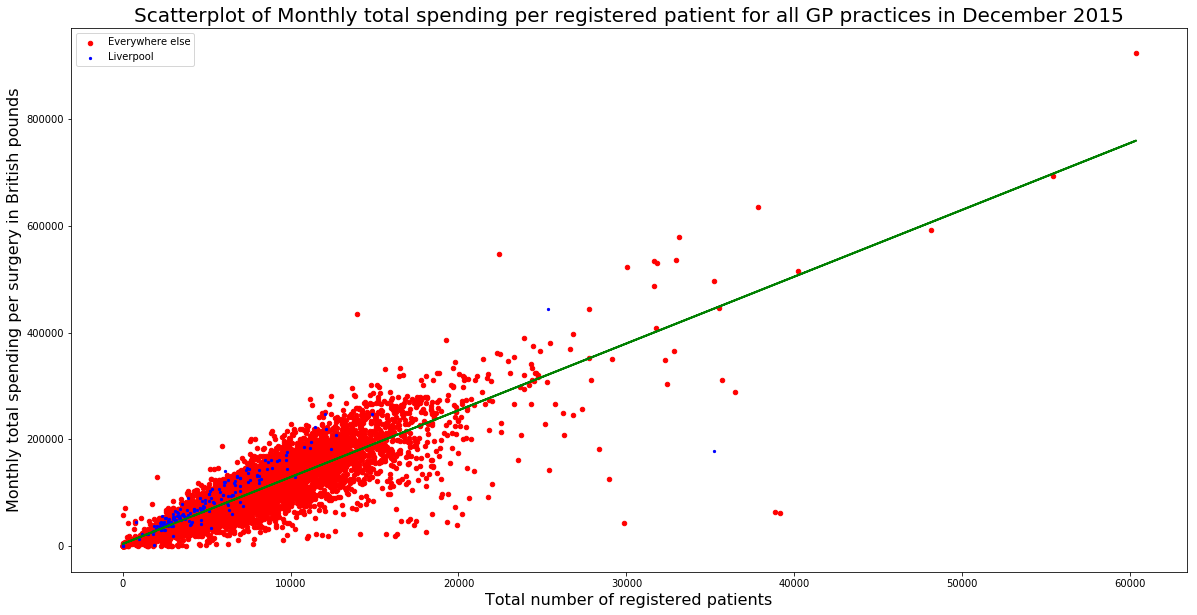

In [36]:
#creating a scatterplot and trend line for monthly total spend per registered patient

x=merged_table['Total_All']
y=merged_table['ACT COST']

#Defining all GP practices not in Liverpool as 'Everywhere else'
ax = merged_table_not_liverpool.reset_index().plot(kind='scatter', x='Total_All', y='ACT COST', color='Red', label='Everywhere else')
merged_table_liverpool.reset_index().plot(kind='scatter', x='Total_All', y='ACT COST', color='Blue', marker='.', label='Liverpool', ax=ax, figsize=(20,10))

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='green', linewidth=2.0)

plt.title("Scatterplot of Monthly total spending per registered patient for all GP practices in December 2015",fontsize=20)
plt.xlabel("Total number of registered patients",fontsize=16)
plt.ylabel("Monthly total spending per surgery in British pounds",fontsize=16)

plt.show()

#### 4. Visualize the relative costs per patient of all national GP practices in a histogram.

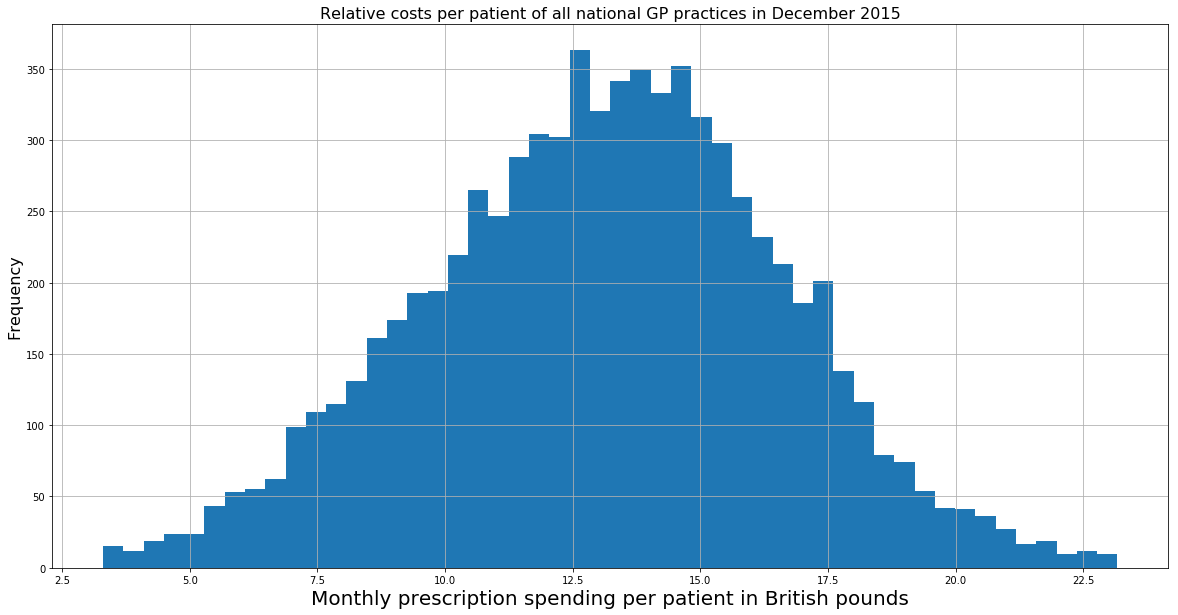

In [37]:
#creating a histogram of relative costs per patient with bounds at the 0.01 and 0.99 quantile
merged_table['Relative cost per patient / £'].hist(bins=50, range=(merged_table['Relative cost per patient / £'].quantile(0.01), merged_table['Relative cost per patient / £'].quantile(0.99)),figsize=(20,10))

plt.xlabel("Monthly prescription spending per patient in British pounds",fontsize=20)
plt.ylabel("Frequency",fontsize=16)
plt.title("Relative costs per patient of all national GP practices in December 2015",fontsize=16)

plt.show()

#### 5. Use descriptive statistics to show how your assigned city compares to the national level.

In [38]:
#displaying the count, mean, standard deviation and quartiles for Relative cost per patient in Liverpool practices only
merged_table_liverpool['Relative cost per patient / £'].describe()

count    170.000000
mean      17.477802
std       10.581150
min        0.724164
25%       14.864245
50%       16.339222
75%       18.231089
max      120.235000
Name: Relative cost per patient / £, dtype: float64

In [39]:
#displaying the count, mean, standard deviation and quartiles for Relative cost per patient in practices not in Liverpool
merged_table_not_liverpool['Relative cost per patient / £'].describe()

count     7531.000000
mean        21.403987
std        673.039684
min          0.001872
25%         10.642422
50%         13.136634
75%         15.411240
max      58319.780000
Name: Relative cost per patient / £, dtype: float64

In [40]:
#displaying the count, mean, standard deviation and quartiles for Relative cost per patient related to all national practices
merged_table['Relative cost per patient / £'].describe()

count     7701.000000
mean        21.317316
std        665.570655
min          0.001872
25%         10.689451
50%         13.212266
75%         15.504289
max      58319.780000
Name: Relative cost per patient / £, dtype: float64

C:\Users\Emma\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,u'Relative cost per patient in British pounds')

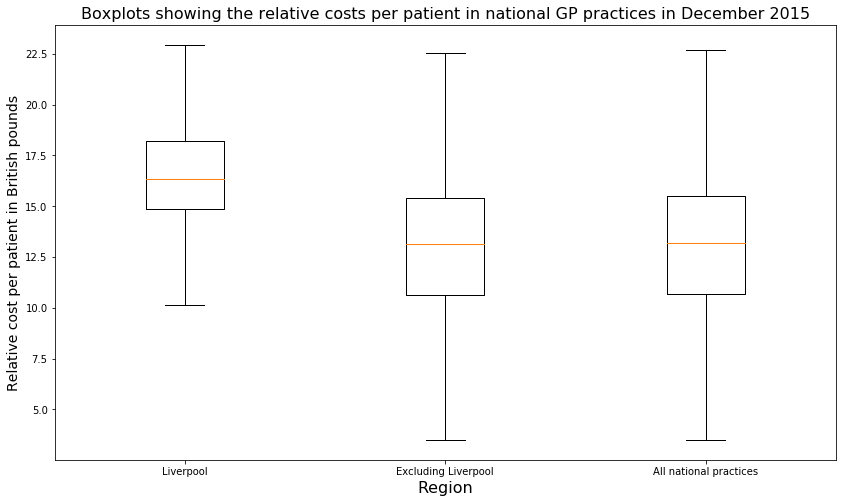

In [41]:
data = [merged_table_liverpool['Relative cost per patient / £'], merged_table_not_liverpool['Relative cost per patient / £'],merged_table['Relative cost per patient / £']]

labels = ['Liverpool', 'Excluding Liverpool', 'All national practices']

#showing a boxplot for Liverpool data versus other data versus all data combined, not including outliers
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.boxplot(data, showfliers=False, labels=labels) 
plt.title('Boxplots showing the relative costs per patient in national GP practices in December 2015',fontsize=16)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Relative cost per patient in British pounds',fontsize=14)

From the statistics above, the mean relative cost per patient across Liverpool GP practices (£17.48) is lower than that in practices outside of Liverpool (£21.40) and than the national mean (including Liverpool and other practices; £21.32).

However, looking at these statistics it appears that the maximum value is very high for the national cases outside of Liverpool (£58,319.78 cost per patient compared to just £120.24 in Liverpool). The standard deviation for the national cases outside Liverpool also far exceeds that in Liverpool (£673.04 compared to £10.58 in Liverpool). 

The boxplots above do not include these high outlier values in the national data and show the median and interquartile ranges for relative costs per patient in Liverpool GP practices and in other national GP practices on a single figure. 

The median relative cost per patient is higher in Liverpool than in the rest of the UK (and the whole of the UK when Liverpool is also incorporated) (£16.34 compared to £13.14 and £13.21 respectively). The interquartile range of relative costs per patient in Liverpool also lies above that for the other regions, indicated by the horizontal edges of the boxes on the boxplots (£14.86-£18.23 for Liverpool compared to £10.69-£15.50 for all national data).

### Assignment C. Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

#### 1. Identify for all GP practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [42]:
#creating a pandas Dataframe of prescription data from December 2015 for all statin prescriptions
statin_info1 = dec2015[dec2015['BNF NAME'].str.contains("statin")]

#grouping this data by practice to give total numbers of statin prescriptions and associated costs at GP practice level
statin_info = statin_info1.groupby('PRACTICE', as_index=False).sum()
statin_info[['PRACTICE','ITEMS','ACT COST']]

,PRACTICE,ITEMS,ACT COST
0,A81001,435,1816.80
1,A81002,2467,6530.36
2,A81003,605,868.39
3,A81004,921,2139.41
4,A81005,1266,1891.93
5,A81006,1969,5022.25
6,A81007,1002,2252.79
7,A81008,1101,1398.07
8,A81009,1161,1614.59
9,A81011,1276,2953.01


In [43]:
#merging this practice-level statin prescription data with the demographic data
merged_statin = statin_info.merge(jan2016patients, left_on='PRACTICE', right_on='GP_PRACTICE_CODE', how='inner', validate='m:1')

In [44]:
#showing the relative cost per patient of all statin prescriptions for all GP practices
merged_statin['Relative cost per patient / £'] =  merged_statin['ACT COST'] / merged_statin['Total_All'] 
merged_statin[['PRACTICE', 'Total_All', 'Relative cost per patient / £']]

,PRACTICE,Total_All,Relative cost per patient / £
0,A81001,4234,0.429098
1,A81002,19691,0.331642
2,A81003,3357,0.258680
3,A81004,9151,0.233790
4,A81005,7883,0.240001
5,A81006,12345,0.406825
6,A81007,9744,0.231198
7,A81008,4027,0.347174
8,A81009,9175,0.175977
9,A81011,11435,0.258243


#### 2. Identify for all GP practices the associated Index of Multiple Deprivation (IMD) for each GP practice in your assigned city.

In [45]:
#reading in the deprivation data to a pandas Dataframe called 'IMD'
IMD = pd.read_csv("https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv")

In [46]:
#liverpool_prac is the list of Liverpool practices by practice code
#liverpool is the pandas dataframe of all Liverpool practices derived from the original national practices dataframe pract

liverpool['POSTCODE']=liverpool['POSTCODE'].str.replace(" ","")
IMD['Postcode']=IMD['Postcode'].str.replace(" ","")

C:\Users\Emma\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [47]:
#merging the practice-level data for Liverpool practices with the deprivation data
merged_IMD_liverpool = liverpool.merge(IMD, left_on='POSTCODE', right_on='Postcode', how='inner')

#table showing all GP practices and associated IMDs in Liverpool
merged_IMD_liverpool[['PRACTICE', 'Index of Multiple Deprivation Rank','Index of Multiple Deprivation Decile']]

,PRACTICE,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
0,N82001,1401.0,1.0
1,N82002,301.0,1.0
2,N82003,1301.0,1.0
3,N82004,4459.0,2.0
4,N82004,4459.0,2.0
5,N82034,4459.0,2.0
6,N82034,4459.0,2.0
7,N82009,19898.0,7.0
8,N82011,48.0,1.0
9,N82014,21457.0,7.0


#### 3. Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

In [48]:
#first removing any white space from the postcodes of the merged_statin dataframe
merged_statin['POSTCODE'] = merged_statin['POSTCODE'].str.replace(" ","")

#creating a dataframe with the last decile (>0.90) of relative statin spenders using national-level statin prescription data
highest_statins_spend = merged_statin[merged_statin['Relative cost per patient / £'] > merged_statin['Relative cost per patient / £'].quantile(.9)]
highest_statins_spend.sort_values(by=['Relative cost per patient / £'], ascending=False) #sorting
highest_statins_spend[['PRACTICE','POSTCODE','Relative cost per patient / £']]

,PRACTICE,POSTCODE,Relative cost per patient / £
0,A81001,TS181HU,0.429098
5,A81006,TS182AT,0.406825
22,A81025,TS181HU,0.448895
57,A81066,TS211JS,0.382768
63,A81608,TS176NP,0.375418
72,A81623,TS182EP,0.740678
89,A82014,CA78DS,0.407420
123,A82050,CA142AJ,0.528946
133,A82065,LA117JY,0.514791
151,A82647,LA116PH,0.475052


In [49]:
highest_statins_spend_IMD= highest_statins_spend.merge(IMD, left_on='POSTCODE', right_on='Postcode', how='left')
highest_statins_spend_IMD[['PRACTICE','POSTCODE','Relative cost per patient / £','Index of Multiple Deprivation Rank','Index of Multiple Deprivation Decile']]

,PRACTICE,POSTCODE,Relative cost per patient / £,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
0,A81001,TS181HU,0.429098,73.0,1.0
1,A81001,TS181HU,0.429098,73.0,1.0
2,A81001,TS181HU,0.429098,73.0,1.0
3,A81001,TS181HU,0.429098,73.0,1.0
4,A81006,TS182AT,0.406825,551.0,1.0
5,A81006,TS182AT,0.406825,551.0,1.0
6,A81025,TS181HU,0.448895,73.0,1.0
7,A81025,TS181HU,0.448895,73.0,1.0
8,A81025,TS181HU,0.448895,73.0,1.0
9,A81025,TS181HU,0.448895,73.0,1.0


In [50]:
#creating a dataframe with the first decile (<0.10) of relative statin spenders using national-level statin prescription data
lowest_statins_spend = merged_statin[merged_statin['Relative cost per patient / £'] < merged_statin['Relative cost per patient / £'].quantile(.1)]
lowest_statins_spend.sort_values(by=['Relative cost per patient / £']) #sorting
lowest_statins_spend[['PRACTICE','POSTCODE','Relative cost per patient / £']]

,PRACTICE,POSTCODE,Relative cost per patient / £
70,A81621,TS39NB,0.080352
74,A81630,TS54EQ,0.025084
76,A81632,TS181HU,0.047455
77,A81633,TS15EF,0.012748
78,A81634,TS182EP,0.021187
142,A82613,LA218ER,0.067735
146,A82623,CA142RW,0.110565
164,A83011,DH11QW,0.112821
211,A83068,SR84PF,0.005427
254,A84025,NE236QN,0.009505


In [51]:
lowest_statins_spend_IMD = lowest_statins_spend.merge(IMD, left_on='POSTCODE', right_on='Postcode', how='left')
lowest_statins_spend_IMD[['PRACTICE','POSTCODE','Relative cost per patient / £','Index of Multiple Deprivation Rank','Index of Multiple Deprivation Decile']]

,PRACTICE,POSTCODE,Relative cost per patient / £,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
0,A81621,TS39NB,0.080352,376.0,1.0
1,A81630,TS54EQ,0.025084,3207.0,1.0
2,A81632,TS181HU,0.047455,73.0,1.0
3,A81632,TS181HU,0.047455,73.0,1.0
4,A81632,TS181HU,0.047455,73.0,1.0
5,A81632,TS181HU,0.047455,73.0,1.0
6,A81633,TS15EF,0.012748,81.0,1.0
7,A81634,TS182EP,0.021187,1428.0,1.0
8,A81634,TS182EP,0.021187,1428.0,1.0
9,A82613,LA218ER,0.067735,17679.0,6.0


Using descriptive statistics on these datasets first by calling the describe() function on the 'Index of Multiple Deprivation Rank' column and then on the 'Index of Multiple Deprivation Decile' column for each of the two groups (highest and lowest deciles by relative statin spend):

In [52]:
#considering the distribution of IMD rank for the highest statin spenders
highest_statins_spend_IMD['Index of Multiple Deprivation Rank'].describe()

count     1049.000000
mean     12461.223070
std       9255.236373
min         66.000000
25%       4139.000000
50%      10643.000000
75%      19879.000000
max      32701.000000
Name: Index of Multiple Deprivation Rank, dtype: float64

In [53]:
#considering the distribution of IMD rank for the highest statin spenders
highest_statins_spend_IMD['Index of Multiple Deprivation Decile'].describe()

count    1049.000000
mean        4.322212
std         2.814747
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        10.000000
Name: Index of Multiple Deprivation Decile, dtype: float64

In [54]:
#considering the distribution of IMD rank for the highest statin spenders
lowest_statins_spend_IMD['Index of Multiple Deprivation Rank'].describe()

count     1145.000000
mean     10724.144978
std       8763.185845
min         27.000000
25%       3629.000000
50%       8493.000000
75%      16382.000000
max      32837.000000
Name: Index of Multiple Deprivation Rank, dtype: float64

In [55]:
#considering the distribution of IMD rank for the highest statin spenders
lowest_statins_spend_IMD['Index of Multiple Deprivation Decile'].describe()

count    1145.000000
mean        3.796507
std         2.625451
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: Index of Multiple Deprivation Decile, dtype: float64

First sense-checking the above statistics, it appears that the minimum and maximum values for IMD Decile for both high and low relative statin spenders are 1.0 and 10.0 which fits the expected range of 1.0 - 10.0 for IMD Deciles.

Now considering these statistics, it appears that the mean IMD Rank for the higher statin spenders (+- standard deviation) is 12,461 +- 9,255. For the lowest statin spenders this score is 10,724 +- 8,763. The mean value for IMD Rank is higher for the highest statin spenders than for the lowest statin spenders. Accounting for the standard deviations, IMD ranks overlap between the two groups. 

Considering the quartiles for IMD Rank, the IQR for the highest statin spenders is (4,139-19,879) and (3,629-16,382) for the lowest statin spenders. Again, these ranges are relatively similar in magnitude and overlap to a large extent. 

Carrying out the same process for the IMD Decile scores, the mean IMD Decile (+- standard deviation) for the highest statin spenders is 4 +- 3 and for the lowest is also 4 +- 3, i.e. the same (to 1.s.f.).

Taken together these results suggest there is negligible difference in the IMD scores for the highest and lowest deciles of statin spenders.

#### 4. Identify for all GP practices the associated nine English regions. Identify for each region the associated under-75 mortality rate for cardiovascular diseases for the year 2015.

In [56]:
#reading the ONS regional postcode data into a pandas dataframe
regions = pd.read_csv("https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv")

In [57]:
#defining a list of the nine English regions
reg = ["North East","East Midlands","East of England","London","North West","South East","South West","West Midlands","Yorkshire and The Humber"]

In [58]:
#merging the prescription data for December 2015 grouped by GP practice onto the pract dataframe
practice_data= totals_by_practices.merge(pract, left_on='PRACTICE', right_on='PRACTICE', how='inner')

#ensuring there are no white spaces in postcodes
practice_data['POSTCODE'] = practice_data['POSTCODE'].str.replace(" ","")
regions['Postcode 1'] = regions['Postcode 1'].str.replace(" ","")

#creating a dataframe with the ONS regional postcode data merged with the practice data for GPs in our HSCIC GP prescribing data
data_by_region= practice_data.merge(regions, left_on='POSTCODE', right_on='Postcode 1', how='inner')

#only showing those GPs where the Region Name corresponds to the one of the nine English regions
data_by_region = data_by_region[data_by_region['Region Name'].isin(reg)]

In [59]:
#identifying the associated nine English regions for all GP practices
data_by_region[['PRACTICE','POSTCODE','Region Name']]

,PRACTICE,POSTCODE,Region Name
0,A81001,TS181HU,North East
1,A81025,TS181HU,North East
2,A81632,TS181HU,North East
3,Y04079,TS181HU,North East
4,A81002,TS182AW,North East
5,A81003,TS268DB,North East
6,A81060,TS268DB,North East
7,A81613,TS268DB,North East
8,A81004,TS13BE,North East
9,A81005,TS147DJ,North East


In [60]:
#reading in the under-75 mortality rate data for cardiovascular diseases in the year 2015
CVD = pd.read_csv("https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv", thousands=',')

In [61]:
#only considering the cardiovascular data for the year 2015
Year2015 = CVD['Year'] == 2015

#considering both male and female genders
AllGender = CVD['Gender'] == 'Person'

#only considering cardiovascular cases where the region is one of the nine English regions defined in the reg list above
region_given = CVD['Level description'].isin(reg)

#considering the case for all ages at once
all_ages = CVD['Age'] == 'All'

#combining the four criteria given above to determine a final dataframe of relevant cardiovascular cases
CVD1 = CVD[Year2015 & AllGender & region_given & all_ages]

In [62]:
#converting the numerator and denominator columns to numbers
Num = pd.to_numeric(CVD1['Numerator'])
Den = pd.to_numeric(CVD1['Denominator'])

#calculating a mortality rate for each English region from the numerator and denominator columns
CVD1['Under 75 mortality rate from cardiovascular disease per 100,000 patients'] =  Num / Den * 100000
CVD1[['Level description','Under 75 mortality rate from cardiovascular disease per 100,000 patients']]

C:\Users\Emma\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Level description,"Under 75 mortality rate from cardiovascular disease per 100,000 patients"
471,East Midlands,73.924700
472,East of England,63.248881
473,London,49.179529
474,North East,83.368070
475,North West,82.133374
476,South East,57.134816
477,South West,67.197601
478,West Midlands,71.666919
479,Yorkshire and The Humber,76.219143


#### 5. Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

In [63]:
#creating a dataframe with statin prescriptions by GP practice merged with regional postcode data
statin_data_by_region = merged_statin.merge(regions, left_on='POSTCODE', right_on='Postcode 1', how='inner')

In [64]:
#creating a pandas dataframe of all statin prescription and demographic data grouped by English region
#choosing to take the mean value of relative cost per patient across all GP practices within each region

RegStatSpend = pd.DataFrame(statin_data_by_region.groupby(statin_data_by_region['Region Name']).apply(lambda subf: subf['Relative cost per patient / £'].mean()))
RegStatSpend.columns = ['Regional statin spend / £ per patient'] 
# Reseting the index
RegStatSpend.reset_index(inplace=True)

RegStatSpend

,Region Name,Regional statin spend / £ per patient
0,East Midlands,0.229102
1,East of England,0.225417
2,London,0.905791
3,North East,0.269907
4,North West,0.259626
5,South East,0.240162
6,South West,0.256390
7,West Midlands,0.241066
8,Yorkshire and The Humber,0.272223


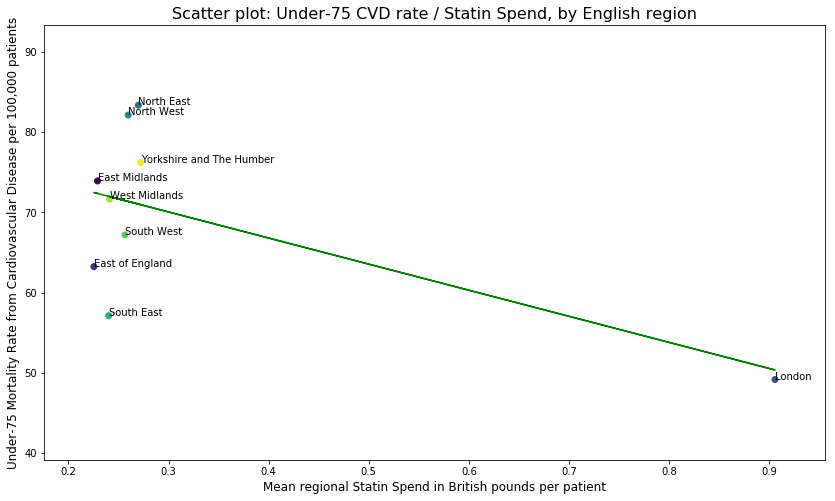

In [69]:
RegStatSpend['Reg Stat Spend'] = RegStatSpend['Regional statin spend / £ per patient']

x = RegStatSpend['Reg Stat Spend'].tolist()
y = CVD1['Under 75 mortality rate from cardiovascular disease per 100,000 patients'].tolist()
fig, ax1 = plt.subplots(figsize=(14, 8))
t = np.arange(9)

ax1.scatter(x, y, c=t)

plt.title('Scatter plot: Under-75 CVD rate / Statin Spend, by English region',fontsize=16)
plt.xlabel("Mean regional Statin Spend in British pounds per patient",fontsize=12)
plt.ylabel("Under-75 Mortality Rate from Cardiovascular Disease per 100,000 patients",fontsize=12)

max_x = (RegStatSpend['Regional statin spend / £ per patient'].max()) + 0.05
max_y = (CVD1['Under 75 mortality rate from cardiovascular disease per 100,000 patients'].max()) + 10
min_x = (RegStatSpend['Regional statin spend / £ per patient'].min()) - 0.05
min_y = (CVD1['Under 75 mortality rate from cardiovascular disease per 100,000 patients'].min()) - 10

plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

x1 = RegStatSpend['Reg Stat Spend']
y1 = CVD1['Under 75 mortality rate from cardiovascular disease per 100,000 patients']

fit = np.polyfit(x1, y1, deg=1) 
plt.plot(x, fit[0]*x1 + fit[1], color='green') 

#defining a list of the nine English regions
reg = ["East Midlands","East of England","London","North East","North West","South East","South West","West Midlands","Yorkshire and The Humber"]

for i, txt in enumerate(reg):
    ax1.annotate(txt, (x[i],y[i]))

plt.show()

In [66]:
#printing fit to show the coefficients for the trendline
fit

array([-32.50402355,  79.81382683])

In [70]:
#calculating the Pearson Correlation Coefficient to establish whether there is a linear correlation between the two datasets

#N.B. The Pearson Corr. Coefficient assumes normal distribution in both datasets: regional statin spend and under 75 CVD rate

np.corrcoef(RegStatSpend['Reg Stat Spend'], CVD1['Under 75 mortality rate from cardiovascular disease per 100,000 patients'])[0, 1]

-0.628347216553441

Drawing final conclusions: 

A scatterplot of under-75 mortality rate for CVD (per 100,000 people) plotted against relative statin spend per patients shows evidence of negative correlation between the variables when grouping patients by English region. 

A linear trendline fitted to this data has a slope of approximately -33 suggesting that a £1 increase in statin spend per patient is associated with 33 fewer patients (out of every 100,000) dying as a result of cardiovascular disease. 

The Pearson Correlation Coefficient between these variables is -0.63. The modulus of this coefficient can be considered quite high (i.e. between 0.5 and 1) and the negative sign indicates negative correlation. However, this should be caveated wtih the fact that the Pearson Correlation Coefficient applies to datasets that are normally distributed - an assumption made in this example but not formally tested. 

This weakly negative correlation between the variables could be explained by the idea that an increase in spend on statins, a class of lipid-lowering drugs designed to reduce CVD, reduces CVD mortality. However, as ever, we must be cautious in assuming causality of relationships.

However, the scatterplot also shows the point for London clearly set apart from those for other regions. London appears to be an outlier compared to other regions. By eye, it looks as though - were the London datapoint to be removed - that there may in fact be positive correlation between the variables of mortality rate and relative statin spend. 

### Assignment D. Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere. For each of country:

#### 1. Provide a visualisation of the seasonal patterns across all years.

##### Southern Hemisphere country selected: Argentina

In [71]:
#creating a pandas dataframe of all flu trend data for Argentina
argentinaFluTrends = pd.read_csv('https://www.google.org/flutrends/about/data/flu/ar/data.txt',sep=',',header=8)
argentinaFluTrends['Date'] = pd.to_datetime(argentinaFluTrends['Date'])

##### Northern Hemisphere country selected: Russia

In [72]:
#creating a pandas dataframe of all flu trend data for Russia
russiaFluTrends = pd.read_csv('https://www.google.org/flutrends/about/data/flu/ru/data.txt',sep=',',header=8)
russiaFluTrends['Date'] = pd.to_datetime(russiaFluTrends['Date'])

Text(0.5,0,u'Year')

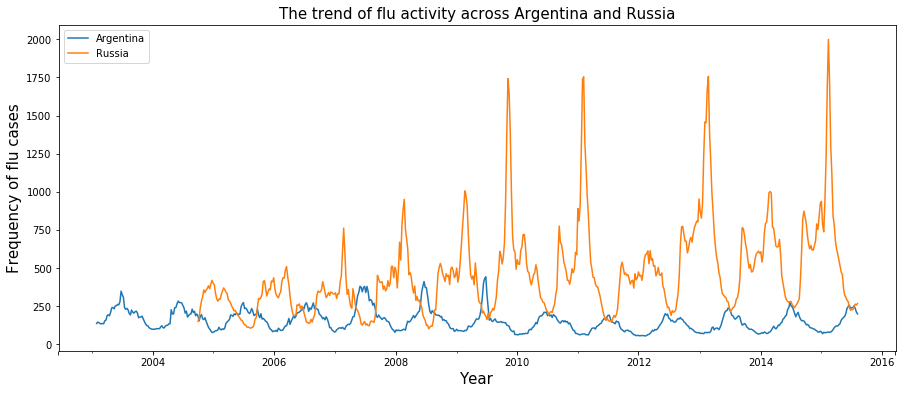

In [73]:
%matplotlib inline

#Plotting the flu trends for Argentina
ax = argentinaFluTrends.plot(legend ='left', x='Date', y = 'Argentina', figsize=(15, 6), grid=True)

#superimposing a plot of the flu trends for Russia onto the flu trends plot for Argentina
russiaFluTrends.plot(x='Date', y = 'Russia' , ax=ax)

ax.set_title('The trend of flu activity across Argentina and Russia',fontsize=15)
ax.set_ylabel('Frequency of flu cases',fontsize=15)
ax.set_xlabel('Year',fontsize=15)

#### 2. Calculate the yearly minimum and maximum for each country. Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

###### First considering the yearly maximum flu rates for Argentina:

In [74]:
#extracting the year from the date data for Argentina flu trends
argentinaFluTrends['year'] = argentinaFluTrends['Date'].dt.year

In [75]:
#first creating a pandas dataframe with the yearly maximum flu rate for Argentina for each day of the week
argMax = pd.DataFrame(argentinaFluTrends.groupby(argentinaFluTrends['year']).apply(lambda x: x.max()))

In [76]:
#dropping the year and date columns to leave a pandas dataframe with just the yearly maximum flu rates for each weekday
argMax2 = argMax.drop(['year','Date'], axis=1)

#now taking the maximum yearly flu rate for each year across all the weekdays 
argentinaAnnualMax = pd.DataFrame(argMax2.max(axis=1))
argentinaAnnualMax.columns = ['Maximum Flu Frequency']
argentinaAnnualMax.reset_index(inplace=True)
argentinaAnnualMax

,year,Maximum Flu Frequency
0,2003,348.0
1,2004,417.0
2,2005,300.0
3,2006,298.0
4,2007,528.0
5,2008,440.0
6,2009,559.0
7,2010,243.0
8,2011,211.0
9,2012,229.0


###### Next considering the yearly minimum flu rates for Argentina:

In [77]:
#creating a pandas dataframe with the yearly minimum flu rate for Argentina for each day of the week
argMin = pd.DataFrame(argentinaFluTrends.groupby(argentinaFluTrends['year']).apply(lambda x: x.min()))

#dropping the year and date columns to leave a pandas dataframe with just the yearly minimum flu rates for each weekday
argMin2 = argMin.drop(['year','Date'], axis=1)

#now taking the minimum yearly flu rate for each year across all the weekdays 
argentinaAnnualMin = pd.DataFrame(argMin2.min(axis=1))
argentinaAnnualMin.columns = ['Minimum Flu Frequency']
argentinaAnnualMin.reset_index(inplace=True)
argentinaAnnualMin

,year,Minimum Flu Frequency
0,2003,100.0
1,2004,77.0
2,2005,78.0
3,2006,71.0
4,2007,74.0
5,2008,77.0
6,2009,61.0
7,2010,16.0
8,2011,54.0
9,2012,46.0


###### Next considering the yearly maximum flu rates for Russia:

In [78]:
#extracting the year from the date data for Russia flu trends
russiaFluTrends['year'] = russiaFluTrends['Date'].dt.year

In [79]:
#creating a pandas dataframe with the yearly maximum flu rate for Russia for each day of the week
rusMax = pd.DataFrame(russiaFluTrends.groupby(russiaFluTrends['year']).apply(lambda x: x.max()))

#dropping the year and date columns to leave a pandas dataframe with just the yearly maximum flu rates for each weekday
rusMax2 = argMax.drop(['year','Date'], axis=1)

#now taking the maximum yearly flu rate for each year across all the weekdays 
russiaAnnualMax = pd.DataFrame(rusMax2.max(axis=1))
russiaAnnualMax.columns = ['Maximum Flu Frequency']
russiaAnnualMax.reset_index(inplace=True)
russiaAnnualMax

,year,Maximum Flu Frequency
0,2003,348.0
1,2004,417.0
2,2005,300.0
3,2006,298.0
4,2007,528.0
5,2008,440.0
6,2009,559.0
7,2010,243.0
8,2011,211.0
9,2012,229.0


###### Finally considering the yearly minimum flu rates for Russia:

In [80]:
#creating a pandas dataframe with the yearly minimum flu rate for Russia for each day of the week
rusMin = pd.DataFrame(russiaFluTrends.groupby(russiaFluTrends['year']).apply(lambda x: x.min()))

#dropping the year and date columns to leave a pandas dataframe with just the yearly minimum flu rates for each weekday
rusMin2 = rusMin.drop(['year','Date'], axis=1)

#now taking the minimum yearly flu rate for each year across all the weekdays
russiaAnnualMin = pd.DataFrame(rusMin2.min(axis=1))
russiaAnnualMin.columns = ['Minimum Flu Frequency']
russiaAnnualMin.reset_index(inplace=True)
russiaAnnualMin

,year,Minimum Flu Frequency
0,2004,150
1,2005,105
2,2006,136
3,2007,121
4,2008,101
5,2009,162
6,2010,193
7,2011,144
8,2012,189
9,2013,215


The mathematical functions which I have decided to plot to represent these national flu trends are sinusoidal functions. 

I decide to take the means of the maximum and minimum yearly flu frequencies for each of the two countries in turn.

I then calculate the difference between the mean maximum and mean minimum yearly flu rate for each country, and assign this value to be twice the amplitude of a sinusoidal function for which one period is one calendar year.

I choose the functions to have their maximum amplitude on January 1st (i.e. in the winter) for the Northern Hemisphere country (in this case Russia) and their minimum amplitude on July 1st in the summer. By contrast, I assign the maximum amplitude in the summer on July 1st for the Southern Hemisphere country (in this case Argentina) and the minimum amplitude in Winter on January 1st.

###### First plotting a mathematical function for the Argentina case:

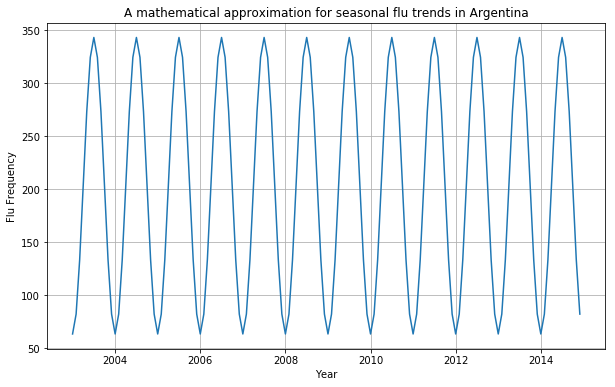

In [81]:
#setting the calendar dates between which my function applies
mintime = (argentinaAnnualMax['year']).min()
maxtime = (argentinaAnnualMax['year']).max()

#creating a range of time over which to plot the function and plotting a value for each month
time = np.arange(mintime,maxtime,1.0/12)

#assigning the amplitude of my sinusoid by taking the difference of the means of maximum and minimum yearly flu frequencies
amp = (argentinaAnnualMax['Maximum Flu Frequency'].mean() - argentinaAnnualMin['Minimum Flu Frequency'].mean()) / 2

#assigning the midpoint of my sinusoid above and below which it varies with amplitude amp
midargentina = argentinaAnnualMin['Minimum Flu Frequency'].mean() + amp

#calculating the rate of change of flu frequency with time
amplitude = (amp * np.sin((time-mintime)*2*np.pi - np.pi/2)) + midargentina

#plotting the resulting sinusoid
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.plot(time,amplitude)

plt.grid(True)
plt.title('A mathematical approximation for seasonal flu trends in Argentina')
plt.xlabel('Year')
plt.ylabel('Flu Frequency')

plt.show()

###### Now creating a mathematical approximation to the seasonal flu trends for Russia in the same way:

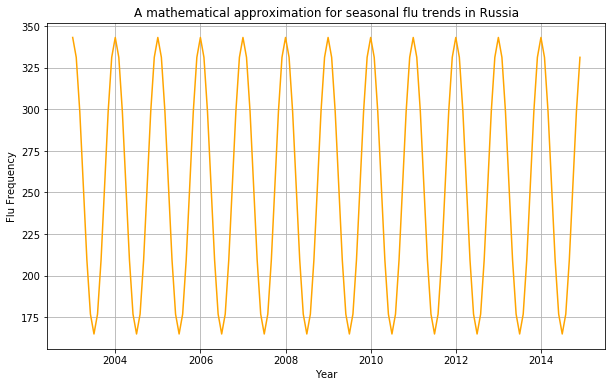

In [82]:
#setting the calendar dates between which my function applies
rmintime = (russiaAnnualMax['year']).min()
rmaxtime = (russiaAnnualMax['year']).max()


#creating a range of time over which to plot the function and plotting a value for each month
rtime = np.arange(rmintime,rmaxtime,1.0/12)

#assigning the amplitude of my sinusoid by taking the difference of the means of maximum and minimum yearly flu frequencies
russamp = (russiaAnnualMax['Maximum Flu Frequency'].mean() - russiaAnnualMin['Minimum Flu Frequency'].mean()) / 2

#assigning the midpoint of my sinusoid above and below which it varies with amplitude amp
midrussia = russiaAnnualMin['Minimum Flu Frequency'].mean() + russamp

#calculating the rate of change of flu frequency with time
ramplitude = (russamp * np.sin((rtime-rmintime)*2*np.pi + np.pi/2)) + midrussia

#plotting the resulting sinusoid
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.plot(rtime,ramplitude,color='orange')

plt.grid(True)
plt.title('A mathematical approximation for seasonal flu trends in Russia')
plt.xlabel('Year')
plt.ylabel('Flu Frequency')

plt.show()

##### Advantages of the chosen mathematical functions:

For flu trends, the maximum peaks for flu frequency for each country are typically separated by a constant period of one year, as are the minimums for flu frequencies. This means that sinusoidal functions, characterised by a fixed period, are a good basis for mapping the seasonality of flu trends and are also easy to interpret.

###### Disadvantages of the chosen mathematical functions:

The mathematical models created are assuming a constant amplitude for the sinusoid over time. 

In reality, the flu frequency will vary year on year. For example, it can be seen from the plot in part (a) of this exercise that the yearly maximum flu rate is increasing annually in Russia. 

As such, a more appropriate mathematical function would also multiply the underlying sinusoidal function by a multiplicative factor increasing exponentially with time of the form A*(e^(time)). 

I generate a plot using a function of this form below, for the Russia data. Here, the value of 1.22 is determined to be the best value (to 2.d.p) to use to generate data where the maximum flu rate increases by about four times over the ten years of data collection, to match the empirical data in part (a). We assume that the minimum flu rate remains approximately equal. 

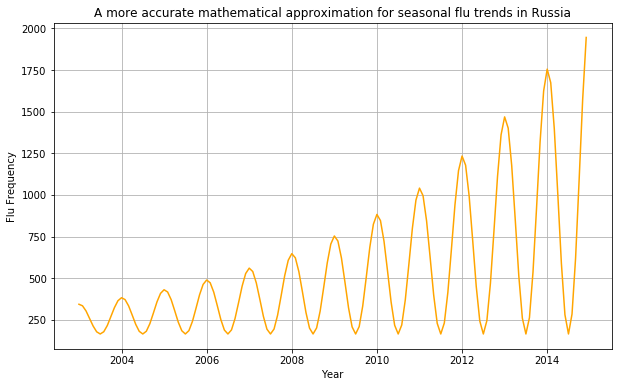

In [83]:
#setting the calendar dates between which my function applies
rmintime = (russiaAnnualMax['year']).min()
rmaxtime = (russiaAnnualMax['year']).max()

#creating a range of time over which to plot the function and plotting a value for each month
rtime = np.arange(rmintime,rmaxtime,1.0/12)

#assigning the amplitude of my sinusoid by taking the difference of the means of maximum and minimum yearly flu frequencies
russamp = np.power(1.22,(rtime-rmintime)) * (russiaAnnualMax['Maximum Flu Frequency'].mean() - russiaAnnualMin['Minimum Flu Frequency'].mean()) / 2

#assigning the midpoint of my sinusoid above and below which it varies with amplitude amp
midrussia = russiaAnnualMin['Minimum Flu Frequency'].mean() + russamp

#calculating the rate of change of flu frequency with time
ramplitude = (russamp * np.sin((rtime-rmintime)*2*np.pi + np.pi/2)) + midrussia

#plotting the resulting sinusoid
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.plot(rtime,ramplitude,color='orange')

plt.grid(True)
plt.title('A more accurate mathematical approximation for seasonal flu trends in Russia')
plt.xlabel('Year')
plt.ylabel('Flu Frequency')

plt.show()